In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
import pickle
from sklearn.model_selection import train_test_split

In [ ]:
model = keras.models.load_model('MobileNetV2_Results/Model_MobileNetV2')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 40, 1280)         5120      
 ormalization)                                                   
                                                                 
 bidirectional (Bidirectiona  (None, 40, 512)          3147776   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 512)              1574912   
 nal)                                                            
                                                                 
 dense (Dense)               (None, 21)                10773     
                                                                 
Total params: 4,738,581
Trainable params: 4,736,021
Non-trainable params: 2,560
__________________________________________

In [ ]:
with open (r"D:\Results\JHMDB\RMobileNetV2_Results\X_MobileNetV2.p", 'rb') as fp:
  X = pickle.load(fp)

with open (r"D:\Results\JHMDB\Results_MobileNetV2\Y_MobileNetV2.p", 'rb') as fp:
  Y = pickle.load(fp)

In [ ]:
def pad_into_array(list, total_length):
  T = []
    
  for i in range(len(list)):
    pad = total_length - X[i].shape[0]
    if pad <= 0:
      T.append(list[i][:total_length, :])
    else:
      T.append(np.pad(list[i], [(0, pad), (0, 0)]))
  
  return np.array(T)

In [ ]:
max_length = 40
X = pad_into_array(X, max_length)

print(type(X))
print(X.shape)
print(type(Y))
print(Y.shape)

<class 'numpy.ndarray'>
(928, 40, 1280)
<class 'numpy.ndarray'>
(928, 21)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(742, 40, 1280)
(742, 21)
(186, 40, 1280)
(186, 21)


In [ ]:
output = 'MobileNetV2_Results/confusion_matrix_MobileNetV2.png'

classes=['brush_hair', 'catch', 'clap', 'climb_stairs', 'golf', 'jump', 'kick_ball', 'pick', 'pour', 'pullup', 'push', 'run', 'shoot_ball', 'shoot_bow', 'shoot_gun', 'sit', 'stand', 'swing_baseball', 'throw', 'walk', 'wave']

print(classes)

['brush_hair', 'catch', 'clap', 'climb_stairs', 'golf', 'jump', 'kick_ball', 'pick', 'pour', 'pullup', 'push', 'run', 'shoot_ball', 'shoot_bow', 'shoot_gun', 'sit', 'stand', 'swing_baseball', 'throw', 'walk', 'wave']


In [ ]:
test_scores = model.evaluate(X_test, Y_test, verbose=0)

print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

predictions = model.predict(X_test)


Test loss: 0.4682442843914032
Test accuracy: 0.8924731016159058


In [ ]:
Y_pred = np.argmax(predictions, axis=1)

Y_true = np.argmax(Y_test, axis=1)

conf_matrix = tf.math.confusion_matrix(labels=Y_true, predictions=Y_pred).numpy()

In [ ]:
con_mat_norm = np.around(conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index = classes, columns = classes)

print(con_mat_df)

                brush_hair  catch  clap  climb_stairs  golf  jump  kick_ball  \
brush_hair             0.8   0.00  0.00           0.0   0.0  0.00       0.00   
catch                  0.0   1.00  0.00           0.0   0.0  0.00       0.00   
clap                   0.0   0.00  0.92           0.0   0.0  0.00       0.00   
climb_stairs           0.0   0.00  0.00           1.0   0.0  0.00       0.00   
golf                   0.0   0.00  0.00           0.0   1.0  0.00       0.00   
jump                   0.0   0.00  0.00           0.0   0.0  0.33       0.67   
kick_ball              0.0   0.11  0.00           0.0   0.0  0.00       0.89   
pick                   0.0   0.00  0.00           0.0   0.0  0.00       0.00   
pour                   0.0   0.00  0.00           0.0   0.0  0.00       0.00   
pullup                 0.0   0.00  0.00           0.0   0.0  0.00       0.00   
push                   0.0   0.00  0.00           0.0   0.0  0.00       0.00   
run                    0.0   0.00  0.00 

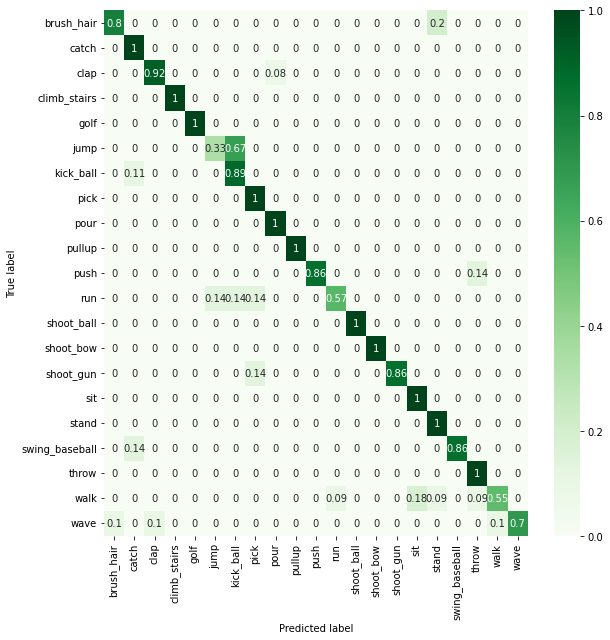

In [ ]:
figure = plt.figure(figsize=(9, 9))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Greens)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig(output, format="png", facecolor='white', transparent=False)